In [258]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
data = pd.read_excel('V02Max_Combined.xlsx')
data_Merged = pd.read_excel("merged_athletes_data.xlsx")
data_Kayaking = pd.read_excel("V02Max_Combined.xlsx", "Kayaking")
data_Athletes = pd.read_excel("V02Max_Combined.xlsx", "Athletes")
data_Triathlon = pd.read_excel("V02Max_Combined.xlsx", "Triathlon")
data_Fencing = pd.read_excel("V02Max_Combined.xlsx", "Fencing")
data_Criteria = pd.read_excel("crieteria_data.xlsx")

/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sravanthithiruveedi/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


**61. Reverse an arrays order in Python. You can use any array with any values you like.**

In [444]:
#define an array
arr = ['2024','Aug','Hackathon','Python']

#reverse an array
arr.reverse()

#print the array
print(f"Reversed array is \n {arr}")

Reversed array is 
 ['Python', 'Hackathon', 'Aug', '2024']


**62. What is the root mean of successive differences for 30 consecutive minutes for each athlete.**

In [478]:
#calculating HR for all the athletes
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','sport']], on='ID', how='inner')

#converting time to minutes
df['Minute'] = df['time'] // 60

#creating a function
def calculate_rmsd(df):
    results = []
    for athlete, group in df.groupby('ID'):
        #sort the data
        group = group.sort_values('Minute')
        
        #calculating successive differences
        group['successive_diff'] = group['Minute'].diff()
        
        #drop NaN values resulting from diff()
        group = group.dropna()
        
        #calculating squared differences
        group['squared_diff'] = group['successive_diff'] ** 2
        
        #calculating mean of squared differences
        mean_squared_diff = group['squared_diff'].mean()
        
        #calculating RMSD
        rmsd = np.sqrt(mean_squared_diff)
        
        #results
        results.append({'ID': athlete, 'RMSD': rmsd})
    
    return pd.DataFrame(results)


#calculating RMSD for each athlete
df_rmsd = calculate_rmsd(df).to_string(index = False)

#printing the result
print(f"The root mean of successive differences for 30 consecutive minutes for each athlete:\n {df_rmsd}")

The root mean of successive differences for 30 consecutive minutes for each athlete:
  ID     RMSD
  1 0.084127
  2 0.089465
  3 0.088568
  4 0.083907
  5 0.086687
  6 0.090569
  7 0.087785
  8 0.089548
  9 0.082054
 10 0.084932
 11 0.085572
 12 0.086043
 13 0.086173
 14 0.086494
 15 0.086226
 16 0.086006
 17 0.090053
 18 0.085983


**63. On average how many minutes did each athlete in the sport of fencing spend in Zone 5?**

In [480]:
#calculating HR for all the athletes in Fencing
df = data_Fencing.assign(HR = 60/(data_Fencing['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','age']], on='ID', how='inner')

#calculating Max HR
df = df.assign(MaxHR = 220 - df['age'])

#calculating the lower bound and upper bound for Zone 5
df['LB_Zone5'] = 0.90 * df['MaxHR']
df['UB_Zone5'] = 1 * df['MaxHR']

#checking if the HR is falling under zone 5
df['Is_Zone5'] = (df['HR'] >= df['LB_Zone5']) & (df['HR'] < df['UB_Zone5'])
df = df[df['Is_Zone5'] == True]

#calculating mean of time spent in zone 5 for each athelte
df_Zone5 = df.groupby(['ID'])['time'].mean().reset_index().to_string(index = False)

#printing the result
print(f"Each athlete in the sport of fencing spent in Zone 5:\n{df_Zone5}")
      

Each athlete in the sport of fencing spent in Zone 5:
 ID        time
  1  583.072779
  2  497.537895
  4 1117.961396
  5 1036.612511
  6  886.838256
  7  590.217437
  8  613.007886
  9  672.265517
 10  699.996670


**64. Count athletes based on Gender using count plot**

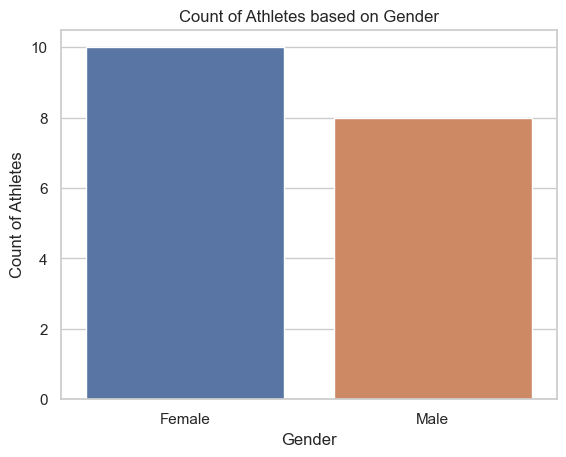

In [507]:
#count plot
plot = sns.countplot(x ='Gender',data = data_Athletes, hue = 'Gender')
plot.set(xlabel = 'Gender',ylabel = 'Count of Athletes')
plt.title("Count of Athletes based on Gender")

#show the plot
plt.show(plot)

**65.    [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
      [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
      [21, 22, 23, 24, 25],
      [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17.**

In [448]:
#given array
arr = np.array([
      [ 1,  2,  3,  4,  5],
      [ 6,  7,  8,  9, 10],
      [11, 12, 13, 14, 15],
      [16, 17, 18, 19, 20],
      [21, 22, 23, 24, 25],
      [26, 27, 28, 29, 30]
      ])

#print the elements 4,7,10,17
print('Sliced elements: \n',arr[0:1, 3:4],arr[1:2, 1:2],arr[1:2, 4:],arr[3:4, 1:2] )

Sliced elements: 
 [[4]] [[7]] [[10]] [[17]]


**66. On average, how long did each participant spend at 200 watts?**

In [491]:
#grouping the data based on ID and power and finding the sum of time spent
df = data_Merged.groupby(['ID', 'power'])['time'].sum().reset_index()

#applying the given condition
df1 = df[df['power']== 200]

#creating a dataFrame with all IDs and the specific power level (200 watts)
all_ids = pd.DataFrame({'ID': df['ID'].unique()})
all_ids['power'] = 200

#performing a left merge to ensure all IDs are included
df1 = pd.merge(all_ids, df[df['power'] == 200], on=['ID', 'power'], how='left')

#fill NaN values in the 'time' column with 0
df1['time'] = df1['time'].fillna(0)

#printing the resultant data
print(f"The time each participant spent at 200 watts is:\n{df1.to_string(index = False)}")

The time each participant spent at 200 watts is:
 ID  power       time
  1    200      0.000
  2    200      0.000
  3    200 111063.168
  4    200 106129.452
  5    200 123354.488
  6    200 124098.652
  7    200      0.000
  8    200      0.000
  9    200  12405.704
 10    200  74352.920
 11    200 114078.616
 12    200 113048.112
 13    200 117426.128
 14    200 136842.528
 15    200 141576.000
 16    200 134196.776
 17    200      0.000
 18    200  61698.584


**67. Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?**

In [492]:
#grouping the data and calculating VO2Sum for each athlete
df = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')

#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, data_Athletes[['ID','Weight','sport']], on='ID', how='inner')

#calculating VO2Max
df1['VO2Max'] = df1['VO2Sum']/df1['Weight']

#calculating the average VO2Max for each sport
df2 = df1.groupby(['sport'])['VO2Max'].mean().reset_index(name = 'Avg_VO2Max')

#finding the highest average VO2 Max
df3 = df2[df2['Avg_VO2Max'] == df2['Avg_VO2Max'].max()] 
sport = df3['sport'].values[0]

#printing the sport
print(f"Athlete from {sport} had the highest average")

Athlete from triathlon had the highest average


**68. What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)**

In [473]:
#calculating HR for all the athletes
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','age']], on='ID', how='inner')

#calculating Max HR
df = df.assign(MaxHR = 220 - df['age'])

#calculating the 90% of Max HR
df['90%ofMaxHR'] = 0.90 * df['MaxHR']

#checking if the HR is exceeding 90% of max HR and assigning true
df['ExceedingMaxHR'] = df['HR'] > df['90%ofMaxHR']
df = df[df['ExceedingMaxHR'] == True]

#calculating the percentage of athletes 
percentage = (df['ID'].nunique()/data_Merged['ID'].nunique())*100

#printing the result
print(f"Percentage of athletes exceeded 90% of max HR is \n{percentage:.2f}%")     

Percentage of athletes exceeded 90% of max HR is 
94.44%


**69. What was the lowest heart rate recorded at a power wattage of 200**

In [494]:
#calculating heart rate and creating a new dataframe
df1 = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#applying the condition on the dataframe
df2 = df1[df1['power']==200]

#assigning to a variable
lowest_hr = df2['HR'].min()

#printing the variable
print(f"Lowest heart rate recorded at a power wattage of 200 is \n{lowest_hr:.2f}")

Lowest heart rate recorded at a power wattage of 200 is 
71.77


**70. On average how long did most atheltes spend at 75% of Max HR (Max HR is calculated as 220-age)**

In [495]:
#calculating HR for all the athletes
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','age']], on='ID', how='inner')

#calculating Max HR
df = df.assign(MaxHR = 220 - df['age'])

#calculating 75% of Max HR
df['75%ofMaxHR'] = 0.75 * df['MaxHR']

#checking if the HR is equal to 75% of max HR and assigning TRUE
df['Is75%ofMaxHR'] = df['HR'] == df['75%ofMaxHR']
df = df[df['Is75%ofMaxHR'] == True]

#assigning 0 to the average_time_spent if datset is empty
if df.empty:
    avg_time_spent = 0
else:
    #grouping by 'ID' and calculating the mean time
    df = df.groupby(['ID'])['time'].mean().reset_index()
    
    #if there are no matching rows for an athlete, fill the resulting NaN with 0
    df['time'] = df['time'].fillna(0)
    
    #calculating the average time spent at 75% of Max HR across all athletes
    avg_time_spent = df['time'].mean()

#printing the result
print(f"The average time spent by most athletes at 75% of max HR is \n{avg_time_spent} sec")

The average time spent by most athletes at 75% of max HR is 
0 sec


**71. Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values**

In [496]:
#calculating HR for all the athletes
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','age']], on='ID', how='inner')

#calculating Max HR
df = df.assign(MaxHR = 220 - df['age'])

#finding HR zones
def hr_zone(HR,MaxHR):
    if HR <= 0.6 * MaxHR:
        return 'Zone 1'
    elif HR <= 0.7 * MaxHR:
        return 'Zone 2'
    elif HR <= 0.8 * MaxHR:
        return 'Zone 3'
    elif HR <= 0.9 * MaxHR:
        return 'Zone 4'
    else:
        return 'Zone 5'
df['HR_Zone'] = df.apply(lambda row:hr_zone(row['HR'], row['MaxHR']),axis = 1)

#merging the data to get sport
df = pd.merge(df, data_Athletes[['ID','sport']], on='ID', how='inner')

#creating crosstab
crosstab = pd.crosstab(df['HR_Zone'], df['sport'])

#printing the result
print(crosstab)

sport    fencing  kayak  triathlon
HR_Zone                           
Zone 1      6590   4782        952
Zone 2      5654   4594       1409
Zone 3      5920   3867        871
Zone 4      7209   4365       1101
Zone 5      2230   1870        648


**72. Provide an example of a lambda function that multiplies any 2 input values.**

In [476]:
#lambda function
multiply = lambda x, y: x * y

#getting input from the user
x = float(input("Enter the first number: "))
y = float(input("Enter the second number: "))

#calling the lambda function with user inputs and printing the result
result = multiply(x, y)

#printing the result
print(f"The result of multiplying {x} and {y} is: {result}")

Enter the first number: 8
Enter the second number: 9
The result of multiplying 8.0 and 9.0 is: 72.0


**73. How long was athlete 17s warm up**

In [497]:
#fetching the athelte 17s information 
df = data_Criteria[data_Criteria['ID'] == 17]

#selecting only at warm up phase
df1 = df[df['phase'] == 'Warm Up']

#summing up the time at warm up and assigning to a variable
time_warmup = abs(df1['time'].sum())

#printing the variable
print(f"The time of athletes 17s warm up is \n{time_warmup} sec")

The time of athletes 17s warm up is 
21963.832 sec


**74. Take a students full name and reverse it using a for loop**

In [498]:
#taking an athlete name
df = data_Athletes.iloc[[9]]

#concatenating first name and last name to get the full name
name = df['First Name'] + ' ' + df['Last Name']
fullname = name.to_string(index=False)
reversed_name = ""

#for loop to reverse the fullname
for i in fullname:
    reversed_name = i + reversed_name
    
#printing the reversed name
print(reversed_name)

nadroJ yliL


**75. What was the maximum heart rate recorded during the test. Which athlete did it belong to? 
Display name, sport and HR**

In [500]:
#calculating HR 
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching maximum HR
df1 = df[df['HR'] == max(df['HR'])]

#display the details of an athlete who has maximum hear rate
df2 = pd.merge(df1, data_Athletes[['ID','First Name','Last Name','sport']], on='ID', how='inner')
df3 = df2[['First Name','Last Name','sport','HR']]
df_maxhr = df3.to_string(index=False)

#printing the result
print(f"The athlete details with maximum heart rate recorded is: \n{df_maxhr}")

The athlete details with maximum heart rate recorded is: 
First Name Last Name   sport         HR
     Grace   Simmons fencing 238.095238


**76. np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.**

In [501]:
#given array
arr = np.arange(1,31).reshape(6,5)

#print the array
print('Actual array: \n',arr)

#print the sliced elements
print('Sliced elements: \n',arr[0:1, 1:2],arr[0:1, 4:],arr[2:3, 2:3],arr[-2:-1, -1:],arr[-1:, -1:])


Actual array: 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Sliced elements: 
 [[2]] [[5]] [[13]] [[25]] [[30]]


**77. Display a violin chart to show distribution of VO2Max against age.**

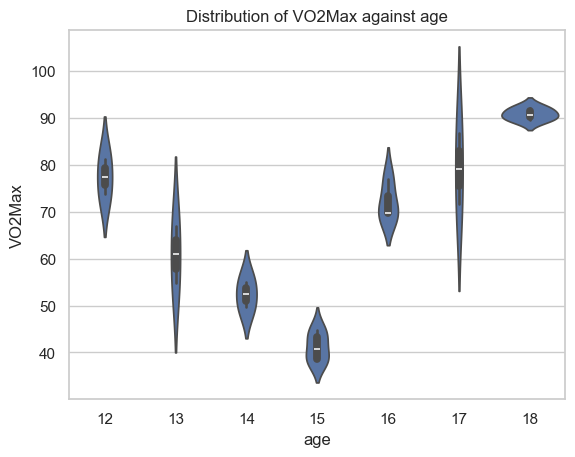

In [504]:
#grouping the data and calculating VO2Sum for each athlete
df = data_Merged.groupby(['ID'])['VO2'].sum().reset_index(name = 'VO2Sum')

#merging the data to fetch the weight of each athlete
df1 = pd.merge(df, data_Athletes[['ID','Weight','age']], on='ID', how='inner')

#calculating VO2Max
df1['VO2Max'] = df1['VO2Sum']/df1['Weight'] 

#displaying the plot
sns.violinplot(x ='age', y ='VO2Max', data = df1)
plt.title("Distribution of VO2Max against age")
plt.show()

**78. Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.**

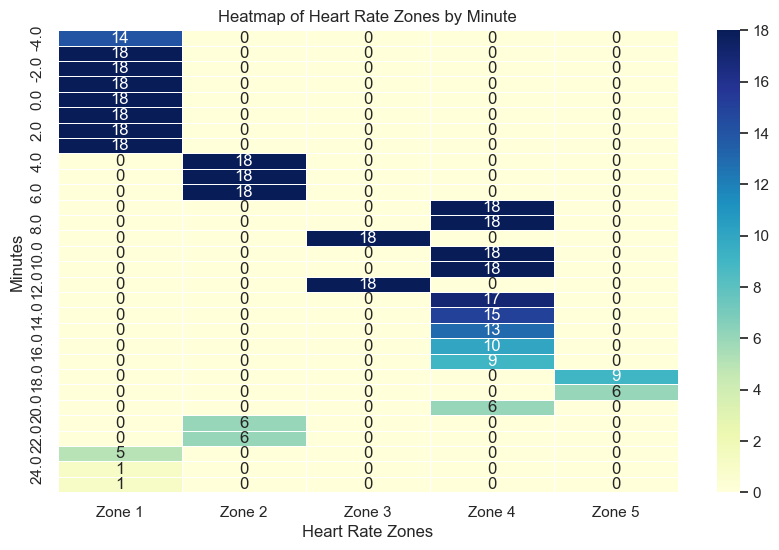

In [508]:
#calculating HR for all the athletes
df = data_Merged.assign(HR = 60/(data_Merged['RR']/1000))

#fetching the age of each athlete
df = pd.merge(df, data_Athletes[['ID','age']], on='ID', how='inner')

#calculating Max HR
df = df.assign(MaxHR = 220 - df['age'])

#finding HR zones
def hr_zone(HR,MaxHR):
    if HR <= 0.6 * MaxHR:
        return 'Zone 1'
    elif HR <= 0.7 * MaxHR:
        return 'Zone 2'
    elif HR <= 0.8 * MaxHR:
        return 'Zone 3'
    elif HR <= 0.9 * MaxHR:
        return 'Zone 4'
    else:
        return 'Zone 5'
df['HR_Zone'] = df.apply(lambda row:hr_zone(row['HR'], row['MaxHR']),axis = 1)

#converting the time to minutes
df['Minute'] = df['time'] // 60

#grouping by the minute and finding the count of athletes and most frequesnt zone in that minute
df_grouped = df.groupby('Minute').agg(noofathletes=('ID', 'nunique'),
             mostfrequentzone=('HR_Zone', lambda x: x.value_counts().idxmax())).reset_index()

#pivoting the data
df_pivot = df_grouped.pivot(index='Minute', columns='mostfrequentzone', values='noofathletes').fillna(0)

#creating a heatmap with the pivoted data
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", linewidths=0.5)

#add labels and title
plt.title("Heatmap of Heart Rate Zones by Minute")
plt.xlabel("Heart Rate Zones")
plt.ylabel("Minutes")

#show the plot
plt.show()

**79. Plot the Donut chart athlete distrubution by Gender**

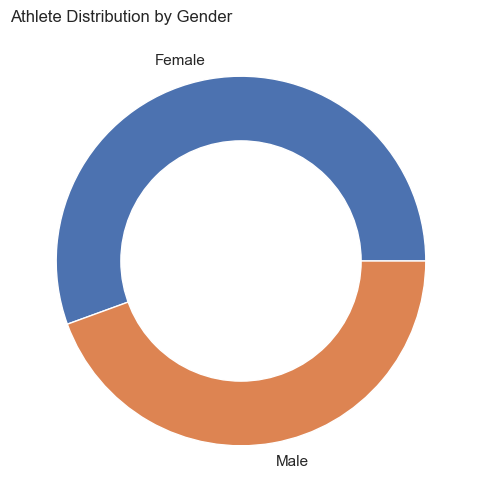

In [509]:
#count of athletes based on gender
count = data_Athletes['Gender'].value_counts()

#choosing the figure size
plt.figure(figsize=(6, 6))

#plotting the pie chart
plt.pie(count, labels=count.index)

#adding circle to the pie chart
hole = plt.Circle((0,0),0.65,facecolor = 'white')
plt.gcf().gca().add_artist(hole)

#adding Title of chart
plt.title('Athlete Distribution by Gender',loc = 'left')

#display the plot
plt.show()

**80. find the size of Tuple for any given input**

In [510]:
#sample tuple
tupl = ("Python","Hackathon","Aug",2024)

#print the size of the tuple
print("Size of Tuple: " + str(tupl.__sizeof__()) + "bytes")

Size of Tuple: 56bytes
